# Question 1
- Pick any file (or files) in NLTK package.
- Prove if Zipf's law works in Natural Language or not.

In [4]:
#Importing the nltk
import nltk

In [5]:
#Displaying the files from webtext package
print(nltk.corpus.webtext.fileids())

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


In [6]:
#To get the os address path of the text file "wine.txt" of NLTK package
print(nltk.corpus.webtext.abspath('wine.txt'))

C:\Users\Malick\AppData\Roaming\nltk_data\corpora\webtext\wine.txt


In [7]:
#To make the program work in all machine, copying the source data "wine.txt" to the local directory address path
#No need to run this code for verifing the program since that file will already be present in local directory
import shutil
shutil.copy2('C:/Users/Malick/AppData/Roaming/nltk_data/corpora/webtext/wine.txt',
             'D:/Course/Course DA-P/Malick_Assignment_Python/Malick_Assignment_2/')

'D:/Course/Course DA-P/Malick_Assignment_Python/Malick_Assignment_2/wine.txt'

In [8]:
#Fetching the input text file using glob module
import glob
import os
file_disk = [os.path.basename(c) for c in glob.glob('wine.txt')]
print(file_disk)

['wine.txt']


In [9]:
#Spliting the raw text into words and striping the special characters 
import string
wine_words = nltk.corpus.webtext.raw(file_disk)
wine_words.split()
wine_strip = [word.strip(string.punctuation) for word in wine_words.split()]
print(len(wine_strip))

25540


In [10]:
#Using lambda function making all characters to lowercase
wine_lower = list(map(lambda x:x.lower(),wine_strip))
print(len(wine_lower))

25540


In [11]:
#Using lambda function filtering only the alphabet character words
wine_alpha = list(filter(lambda x: x.isalpha(), wine_lower))
print(len(wine_alpha))

23240


In [12]:
#importing the stop words from nltk and saved in list "stopwordlist"
stopwordlist = []
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')
print(len(stopwordlist))

153


In [13]:
#Using a fuction removing the stop words from "wine_alpha"
def func():
    wine_nostopwords = []
    for k in wine_alpha:
        if k not in stopwordlist:
            wine_nostopwords.append(k)
    return wine_nostopwords
#The total number of words taken for the analysis of the natural language which will be matching the total frequency in CSV file
print(len(func()))

14171


In [14]:
#Importing Frequency Distribution from nltk package
from nltk import FreqDist
#Calculating the frequency and stored in dictionery "wine_fdist"
wine_fdist = FreqDist(func())
#The total no of unique words taken for the analysis of the natural language which will be matching the word count in CSV file
print(len(wine_fdist))

2564


In [28]:
#Sorting the dictionery with highest frequency in the top and displaying it in the expected format along with headings
wordrow = ['Word']
rankrow = ['Rank']
freqrow = ['Frequency']
rank = 0 
print ("Word"  +  "     \t  " + "Rank" +  " \t  " + "Frequency")
for w in sorted(wine_fdist, key=wine_fdist.get, reverse=True):
    rank = rank + 1
    wordrow.append(w)
    rankrow.append(rank)
    freqrow.append(wine_fdist[w])
#For displaying the data only the first 10 words are printed but all the words are processed on CSV file
rank1 = 0
for w in sorted(wine_fdist, key=wine_fdist.get, reverse=True)[:10]:
    rank1 = rank1 + 1
    print (repr(w)  +  "   \t  " + repr(rank1) +  "   \t  " + repr(wine_fdist[w]))

Word     	  Rank 	  Frequency
'good'   	  1   	  363
'quite'   	  2   	  303
'fruit'   	  3   	  295
'wine'   	  4   	  230
'bit'   	  5   	  217
'top'   	  6   	  215
'lovely'   	  7   	  163
'touch'   	  8   	  160
'nose'   	  9   	  150
'nice'   	  10   	  148


In [34]:
#Writing the above printed output to a CSV file and generated a log-log graph for that in the CSV file 
#Using the local directory address path so the it can be used from any machine
import csv
with open ('Q1_WordRanking.csv', 'w' , newline='') as f:
    w = csv.writer(f,delimiter = ',')
    for i in range (len(wordrow)):
        w.writerow([wordrow[i], rankrow[i], freqrow[i]])

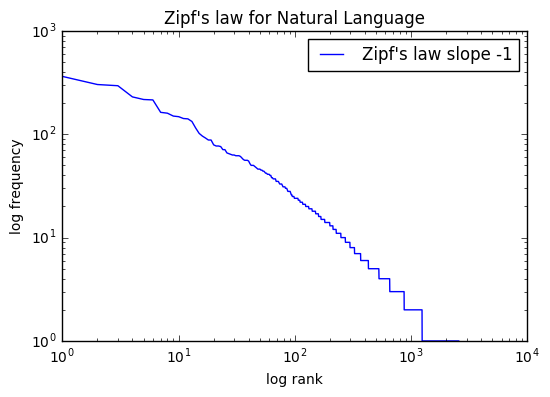

CONCLUTION
Zipf's law works in Natural Language of the webtext package for the wine.txt which results with slope -1
Note: The output graph is also submitted as image in the local directory as well as inside the 'Q1_WordRanking.csv' file


In [41]:
#importing the data from the CSV file and a log-log graph is drawn using matplotlib with rank and frequency of the words
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

with open('Q1_WordRanking.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[1])
        y.append(row[2])
del x[0]
x = [int(i) for i in x]
del y[0]
y = [int(i) for i in y]

plt.loglog(x,y, label="Zipf's law slope -1")
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.title("Zipf's law for Natural Language")
plt.legend()
#Displaying the log-log graph
plt.show()
print("CONCLUTION")
print("Zipf's law works in Natural Language of the webtext package for the wine.txt which results with slope -1")
print("Note: The output graph is also submitted as image in the local directory as well as inside the 'Q1_WordRanking.csv' file")